<a href="https://www.kaggle.com/code/bhavinmoriya/statistics-in-finance?scriptVersionId=124497590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as st
from datetime import datetime as dt, timedelta as td

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Fat tailed distributions

It is very often that returns are fat tailed.

In [2]:
end = dt.today()
start = end - td(days=3000)
df = web.get_data_stooq('AMZN', start, end)[['Close']]
df

,Close
Date,
2023-04-03,102.4100
2023-03-31,103.2900
2023-03-30,102.0000
2023-03-29,100.2500
2023-03-28,97.2400
...,...
2015-01-23,15.6195
2015-01-22,15.5160
2015-01-21,14.8625


In [3]:
log_ret = np.log(df / df.shift())
mu, sigma = log_ret.mean(), log_ret.std()
# df.shift()

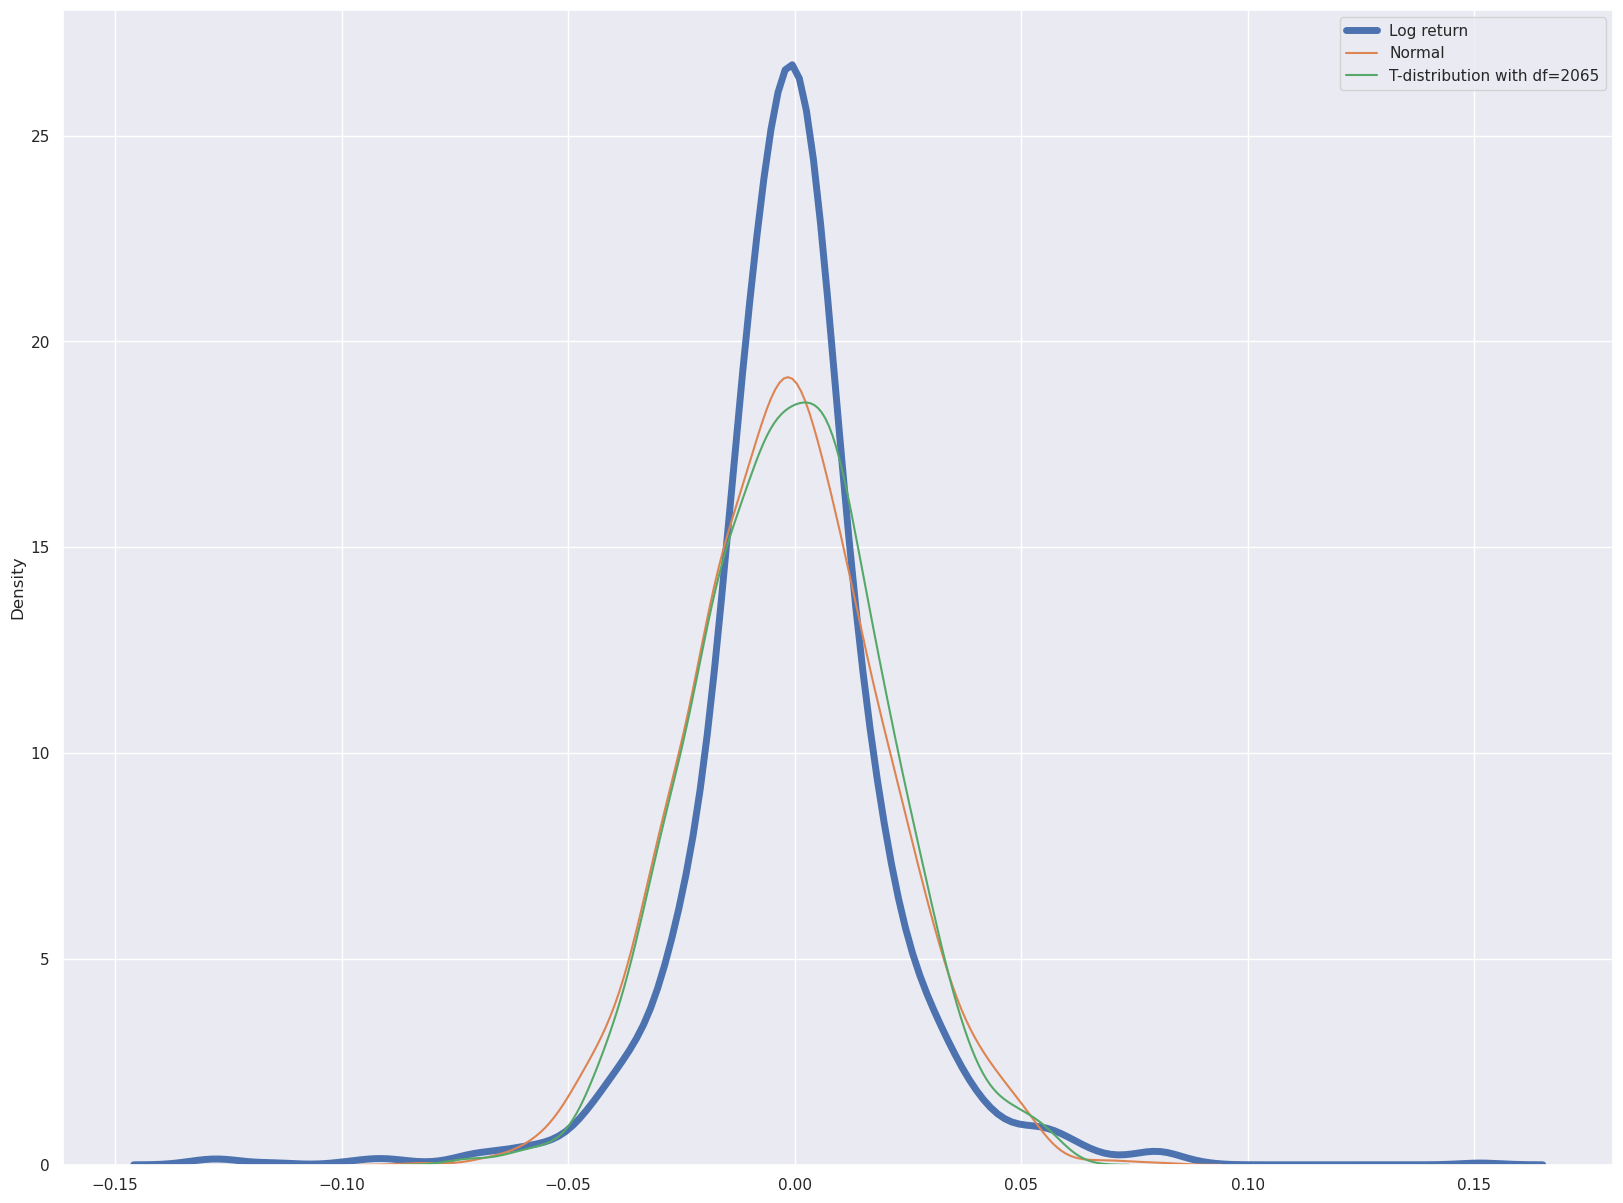

In [4]:
plt.figure(figsize=(20,15))
sns.kdeplot(log_ret, label='Log return', lw=5)
sns.kdeplot(st.norm.rvs(loc=mu, scale=sigma, size=len(log_ret)-1), label='Normal')
sns.kdeplot(st.t.rvs(loc=mu, scale=sigma, size=len(log_ret)-1, df=len(log_ret)-2), 
            label=f'T-distribution with df={len(log_ret)-2}')
plt.legend()

Observe that,
- Log returns have fatter tails compare to Normal Distribution.
- Normal and T-distribution seem to be overlapping (reason is degree of freedom is at lease 35)

We shall do QQ test to see if log_returns are normal. We shall see that it tails will produce points which are off the diagonal line.

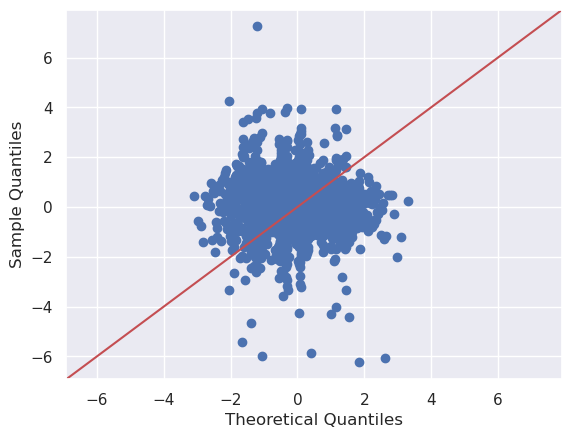

In [5]:
import statsmodels.api as sm
sm.qqplot((log_ret - mu)/sigma, line='45');

This actually shows that the log returns are not normal.

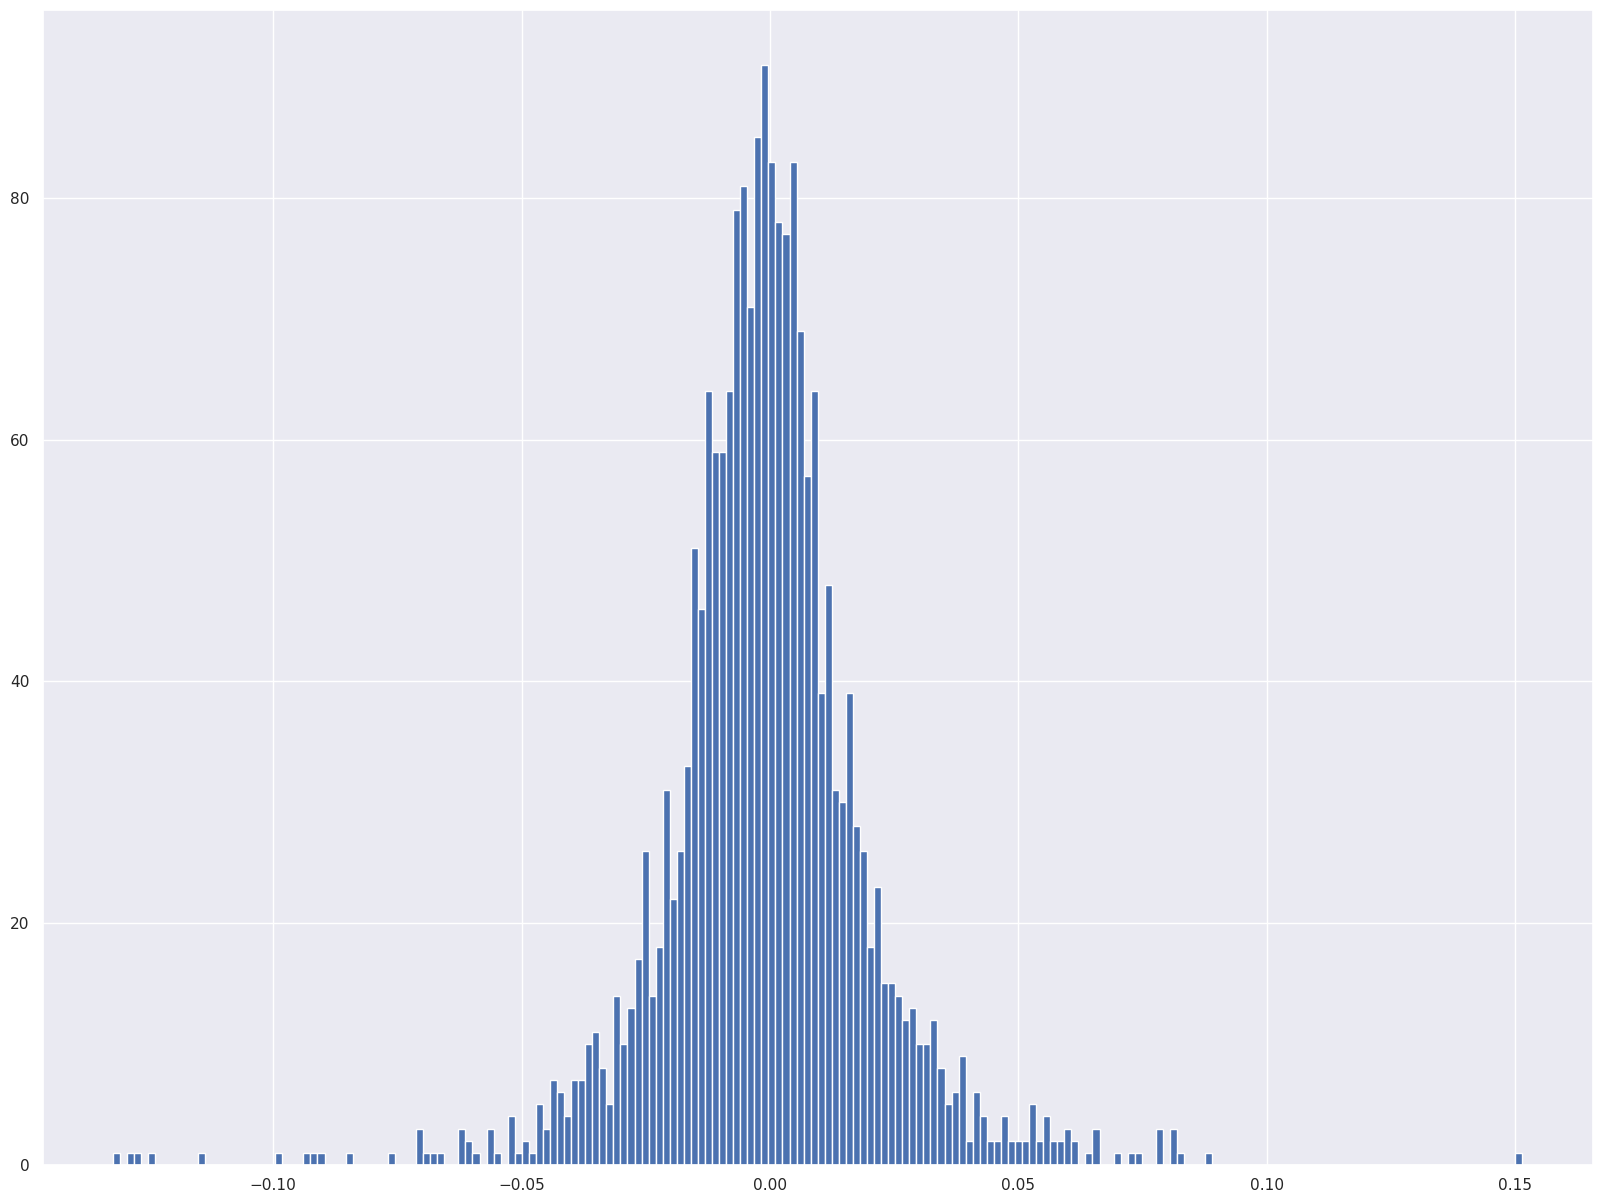

In [6]:
plt.figure(figsize=(20,15))
plt.hist(log_ret, bins=200);